In [ ]:
from mplsoccer.pitch import Pitch
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('input/jugadores_20.csv')

In [ ]:
data

In [ ]:
data.columns.tolist()

In [ ]:
data.dtypes

In [ ]:
# Jugadores mas valiosos

In [ ]:
data.columns.tolist()

In [ ]:
data[["value_eur", "short_name", "nationality", "club", "age"]].sort_values(by="value_eur", ascending=False).head()

In [ ]:
data2 = data[['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'goalkeeping_diving',
'goalkeeping_handling',
'goalkeeping_kicking',
'goalkeeping_positioning'
,'goalkeeping_reflexes'
,'weak_foot']]

In [ ]:
data2 = data2.fillna(0)

In [ ]:
data2 

In [ ]:
# Prediccion valor de todos los jugadores

In [ ]:
X = data2
y = data["value_eur"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

In [ ]:
predict_df = data.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)
sns.scatterplot(x="value_pred", y="value_eur", data=predict_df, color="dodgerblue")

In [ ]:
predict_df.loc[predict_df["value_eur"] >= predict_df["value_pred"] * 2, :].sort_values(by="value_eur", ascending=False).head()

In [ ]:
params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 300, 'min_samples_leaf':9,
          'learning_rate': 0.01, 'loss': 'ls'}

gradient = ensemble.GradientBoostingRegressor(**params)

gradient_boosting = gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

In [ ]:
y_pred

In [ ]:
predict_df = data.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = gradient.predict(X)

In [ ]:
predict_df.loc[predict_df["value_eur"] = predict_df["value_pred"], :].sort_values(by="value_eur", ascending=False)

In [ ]:
# Modelo porteros

In [ ]:
def postition_grouping(value):
    delantero = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']
    medio = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
    defensa = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
    portero = ['gk']
    
    position_dict = {}
    position_dict['delantero'] = delantero
    position_dict['medio'] = medio
    position_dict['defensa'] = defensa
    position_dict['portero'] = portero
    
    value_list = value.replace(' ','').split(',')
    
    for v in value_list:
        for position, items in position_dict.items():
            if v.lower() in items:
                return (position)
    print('Error')

In [ ]:
data['position'] = data['player_positions'].apply(lambda x: postition_grouping(x))
data['sofifa_id'] = data['sofifa_id'].apply(lambda x: int(x))
data.head()

In [ ]:
porteros = data.loc[data['position'] == 'portero']

In [ ]:
porteros

In [ ]:
porteros = porteros[['gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',]]


In [ ]:
porteros

In [ ]:
valor_porteros = data.loc[data['position'] == 'portero']

In [ ]:
valor_porteros['value_eur']

In [ ]:
X = porteros
y = valor_porteros['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
predict_df = data.loc[data['position'] == 'portero']
predict_df = predict_df.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)

predict_df

In [ ]:
# Modelo defensas

In [ ]:
defensas = data.loc[data['position'] == 'defensa']

In [ ]:
defensas = defensas[['pace',
'shooting',
'passing',
'dribbling',
'defending',
'physic',
'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_marking',
'defending_standing_tackle',
'defending_sliding_tackle',
'weak_foot']]

In [ ]:
defensas

In [ ]:
valor_defensas = data.loc[data['position'] == 'defensa']

In [ ]:
valor_defensas

In [ ]:
y

In [ ]:
X = defensas
y = valor_defensas['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
predict_df = data.loc[data['position'] == 'defensa']
predict_df = predict_df.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)

predict_df

In [ ]:
# Modelo medios

In [ ]:
medios = data.loc[data['position'] == 'medio']

In [ ]:
medios = medios[['defending_standing_tackle',
 'dribbling',
 'movement_reactions',
 'movement_reactions',
 'attacking_short_passing',
 'mentality_vision',
 ]]

In [ ]:
medios

In [ ]:
valor_medios = data.loc[data['position'] == 'medio']

In [ ]:
X = medios
y = valor_medios['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
predict_df = data.loc[data['position'] == 'medio']
predict_df = predict_df.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)

predict_df

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

In [ ]:
# Modelo delanteros

In [ ]:
delanteros = data.loc[data['position'] == 'delantero']

In [ ]:
delanteros = delanteros[['mentality_positioning',
 'attacking_finishing',
 'movement_reactions',
 'skill_ball_control',
 'power_shot_power',
 ]]

In [ ]:
delanteros

In [ ]:
valor_delanteros = data.loc[data['position'] == 'delantero']

In [ ]:
X = delanteros
y = valor_delanteros['value_eur']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
predict_df = data.loc[data['position'] == 'delantero']
predict_df = predict_df.loc[:, ["short_name", "nationality", "club", "age", "wage_eur", "value_eur"]]
predict_df["value_pred"] = rf.predict(X)

predict_df

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2: ", metrics.r2_score(y_test,y_pred))

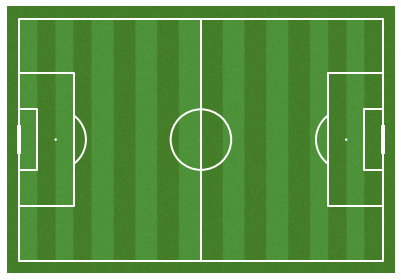

In [2]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
annotation = ax.annotate('aaa', (5, 40), fontsize=30, ha='center')
fig, ax = pitch.draw()

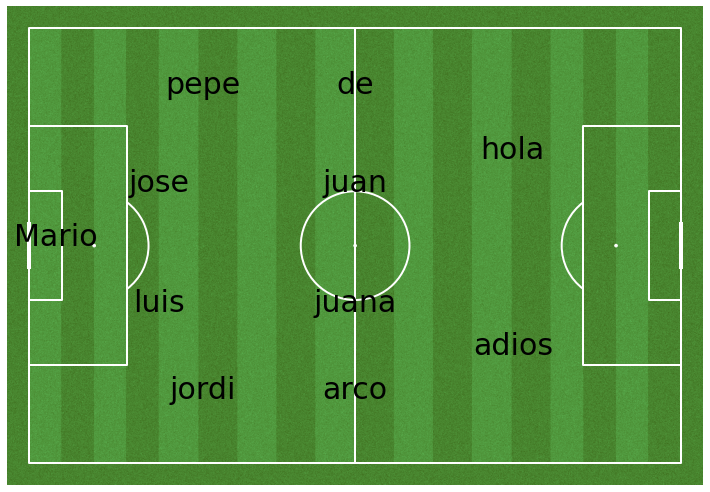

In [97]:
#4-4-2
pitch = Pitch(pitch_color='grass', line_color='white',stripe=True)
fig, ax = pitch.draw(figsize=(10, 20))
annotation = ax.annotate('Mario', (5, 40), fontsize=30, ha='center')
annotation = ax.annotate('jose', (24, 30), fontsize=30, ha='center')
annotation = ax.annotate('luis', (24, 52), fontsize=30, ha='center')
annotation = ax.annotate('pepe', (32, 12), fontsize=30, ha='center')
annotation = ax.annotate('jordi', (32, 68), fontsize=30, ha='center')
annotation = ax.annotate('juan', (60, 30), fontsize=30, ha='center')
annotation = ax.annotate('juana', (60, 52), fontsize=30, ha='center')
annotation = ax.annotate('de', (60, 12), fontsize=30, ha='center')
annotation = ax.annotate('arco', (60, 68), fontsize=30, ha='center')
annotation = ax.annotate('hola', (89, 24), fontsize=30, ha='center')
annotation = ax.annotate('adios', (89, 60), fontsize=30, ha='center')

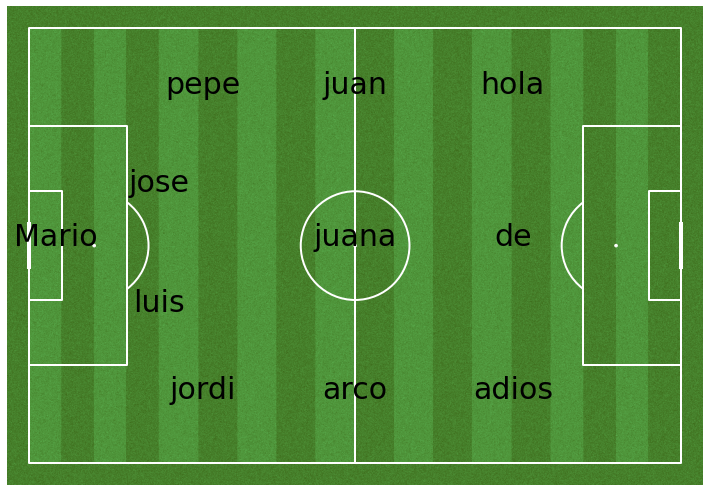

In [96]:
#4-3-3
pitch = Pitch(pitch_color='grass', line_color='white',stripe=True)
fig, ax = pitch.draw(figsize=(10, 20))
annotation = ax.annotate('Mario', (5, 40), fontsize=30, ha='center')
annotation = ax.annotate('jose', (24, 30), fontsize=30, ha='center')
annotation = ax.annotate('luis', (24, 52), fontsize=30, ha='center')
annotation = ax.annotate('pepe', (32, 12), fontsize=30, ha='center')
annotation = ax.annotate('jordi', (32, 68), fontsize=30, ha='center')
annotation = ax.annotate('juan', (60, 12), fontsize=30, ha='center')
annotation = ax.annotate('juana', (60, 40), fontsize=30, ha='center')
annotation = ax.annotate('de', (89, 40), fontsize=30, ha='center')
annotation = ax.annotate('arco', (60, 68), fontsize=30, ha='center')
annotation = ax.annotate('hola', (89, 12), fontsize=30, ha='center')
annotation = ax.annotate('adios', (89, 68), fontsize=30, ha='center')

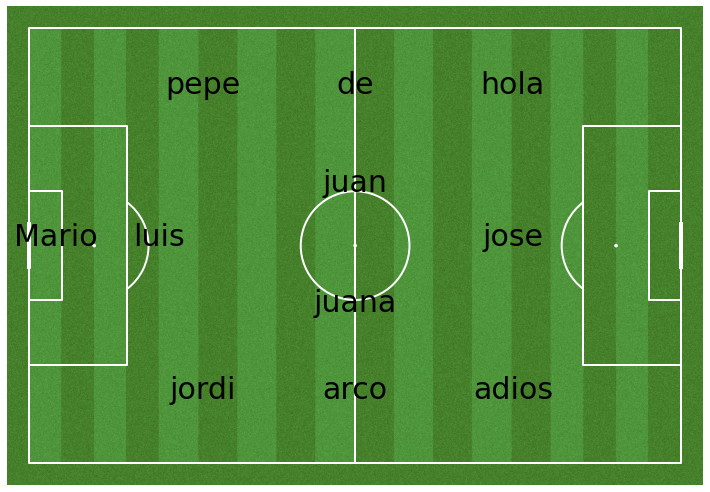

In [95]:
#3-4-3
pitch = Pitch(pitch_color='grass', line_color='white',stripe=True)
fig, ax = pitch.draw(figsize=(10, 20))
annotation = ax.annotate('Mario', (5, 40), fontsize=30, ha='center')
annotation = ax.annotate('jose', (89, 40), fontsize=30, ha='center')
annotation = ax.annotate('luis', (24, 40), fontsize=30, ha='center')
annotation = ax.annotate('pepe', (32, 12), fontsize=30, ha='center')
annotation = ax.annotate('jordi', (32, 68), fontsize=30, ha='center')
annotation = ax.annotate('juan', (60, 30), fontsize=30, ha='center')
annotation = ax.annotate('juana', (60, 52), fontsize=30, ha='center')
annotation = ax.annotate('de', (60, 12), fontsize=30, ha='center')
annotation = ax.annotate('arco', (60, 68), fontsize=30, ha='center')
annotation = ax.annotate('hola', (89, 12), fontsize=30, ha='center')
annotation = ax.annotate('adios', (89, 68), fontsize=30, ha='center')

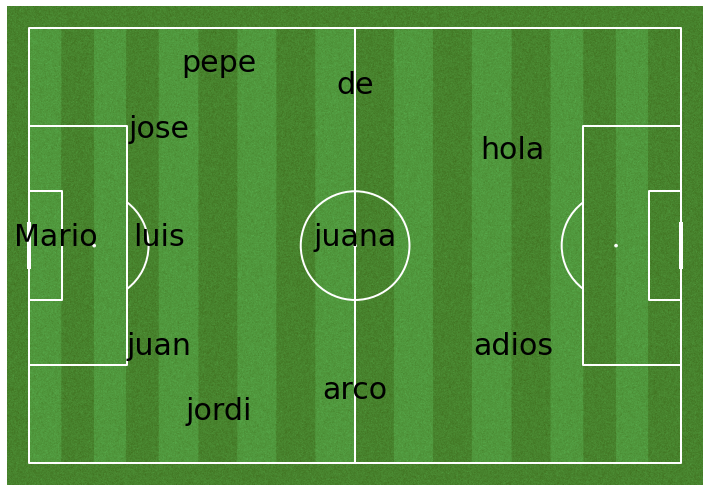

In [94]:
#5-3-2
pitch = Pitch(pitch_color='grass', line_color='white',stripe=True)
fig, ax = pitch.draw(figsize=(10, 20))
annotation = ax.annotate('Mario', (5, 40), fontsize=30, ha='center')
annotation = ax.annotate('jose', (24, 20), fontsize=30, ha='center')
annotation = ax.annotate('luis', (24, 40), fontsize=30, ha='center')
annotation = ax.annotate('pepe', (35, 8), fontsize=30, ha='center')
annotation = ax.annotate('jordi', (35, 72), fontsize=30, ha='center')
annotation = ax.annotate('juan', (24, 60), fontsize=30, ha='center')
annotation = ax.annotate('juana', (60, 40), fontsize=30, ha='center')
annotation = ax.annotate('de', (60, 12), fontsize=30, ha='center')
annotation = ax.annotate('arco', (60, 68), fontsize=30, ha='center')
annotation = ax.annotate('hola', (89, 24), fontsize=30, ha='center')
annotation = ax.annotate('adios', (89, 60), fontsize=30, ha='center')

In [ ]:
import matplotlib.pyplot as plt

from mplsoccer import Pitch